# Compare duplicate observations

In [21]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np

In [3]:
homedir = os.getenv("HOME")
tabledir = homedir+"/research/Virgo/halpha-tables/"

In [6]:
dtab = Table.read(os.path.join(tabledir,"halphagui-output-combined-2023-Aug-21.fits"))

In [20]:
dtab.colnames


['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'NEDname',
 'prefix',
 'HAflag',
 'REDSHIFT',
 'ZDIST',
 'GAL_RA',
 'GAL_DEC',
 'GAL_HRA',
 'GAL_HDEC',
 'ELLIP_RA',
 'ELLIP_DEC',
 'HA_FLAG',
 'FILT_COR',
 'R_FWHM',
 'H_FWHM',
 'POINTING',
 'TEL',
 'DATE-OBS',
 'BBOX',
 'FILTER_RATIO',
 'GAL_XC',
 'GAL_XC_ERR',
 'GAL_YC',
 'GAL_YC_ERR',
 'GAL_MAG',
 'GAL_MAG_ERR',
 'GAL_RE',
 'GAL_RE_ERR',
 'GAL_N',
 'GAL_N_ERR',
 'GAL_BA',
 'GAL_BA_ERR',
 'GAL_PA',
 'GAL_PA_ERR',
 'GAL_SKY',
 'GAL_CHISQ',
 'GAL_2SERSIC',
 'GAL_2SERSIC_ERR',
 'GAL_2SERSIC_ERROR',
 'GAL_2SERSIC_CHISQ',
 'GAL_SERSASYM',
 'GAL_SERSASYM_ERR',
 'GAL_SERSASYM_ERROR',
 'GAL_SERSASYM_CHISQ',
 'GAL_SERSASYM_RA',
 'GAL_SERSASYM_DEC',
 'GAL_HXC',
 'GAL_HXC_ERR',
 'GAL_HYC',
 'GAL_HYC_ERR',
 'GAL_HMAG',
 'GAL_HMAG_ERR',
 'GAL_HRE',
 'GAL_HRE_ERR',
 'GAL_HN',
 'GAL_HN_ERR',
 'GAL_HBA',
 'GAL_HBA_ERR',
 'GAL_HPA',
 'GAL_HPA_ERR',
 'GAL_HSKY',
 'GAL_HCHISQ',
 'GAL_H2SERSIC',
 'GAL_H2SERSIC_ERR',
 'GAL_H2SERSIC_ERROR',
 'GAL_H2SERSIC_CHISQ'

In [8]:
import collections


In [18]:

duplist2 = ([item for item, count in collections.Counter(dtab['VFID']).items() if (count > 1)])
duplist3 = ([item for item, count in collections.Counter(dtab['VFID']).items() if count > 2])

In [19]:
print(len(duplist2),len(duplist3))

164 23


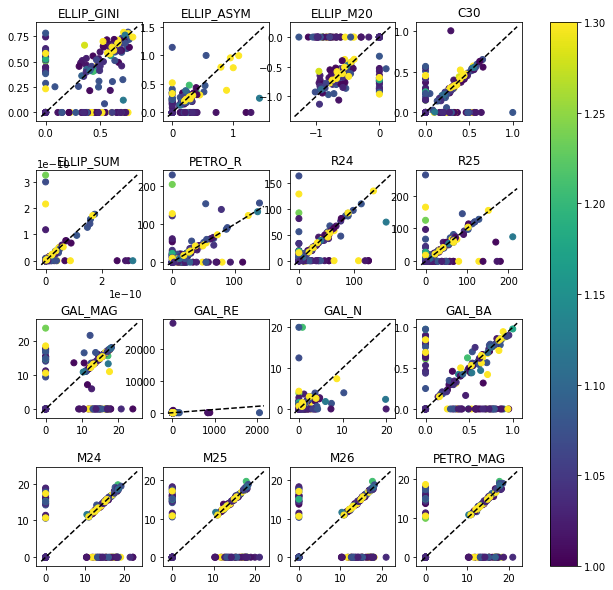

In [43]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in duplist2:
        flag = dtab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(dtab))[flag]
            #print(dtab['VFID'][index])
            x1.append(dtab[c][index[0]])
            x2.append(dtab[c][index[1]])
            filtcor.append(np.max(dtab['FILT_COR'][index]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
plt.colorbar(ax=allax, fraction=0.08)

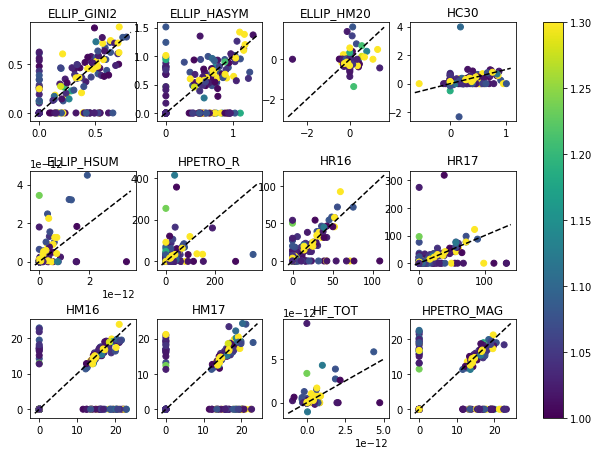

In [45]:
cols = ['ELLIP_GINI2','ELLIP_HASYM','ELLIP_HM20','HC30',\
        'ELLIP_HSUM','HPETRO_R','HR16','HR17',\
        'HM16','HM17','HF_TOT','HPETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in duplist2:
        flag = dtab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(dtab))[flag]
            #print(dtab['VFID'][index])
            x1.append(dtab[c][index[0]])
            x2.append(dtab[c][index[1]])
            filtcor.append(np.max(dtab['FILT_COR'][index]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
plt.colorbar(ax=allax, fraction=0.08)